<a href="https://colab.research.google.com/github/ASHISHVERMA114142/ML_Projects/blob/main/ML_KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KMEANS**

In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
# from sklearn.datasets import load_iris
import sklearn.metrics as sm

Loading all the important libraries that are required...

In [ ]:
iris = pd.read_csv('Iris.csv')

loading Iris.csv file 

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


As we can see that there are four properties of iris flower that are SepalLengthCm	SepalWidthCm	PetalLengthCm	PetalWidthCm and three species are there  Iris-virginica , Iris-setosa , Iris-versicolor . 

Here our aim is that build a model that that divide the our data set into three species according to their properties...


In [ ]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Since kmeans algo does not handle missing values so we are checking for missing values in iris dataset

in iris dataset all the features are of same type so we are not doing any feature scaling ...

In [ ]:
# loading all the numerical properties of the data on a separate data file...
df=iris
x = iris.iloc[:,:-1].values
# x

Now we are trying to see how our data looks likes in the graphical manner it help us to make further classification so we are using multivarient analysis 


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


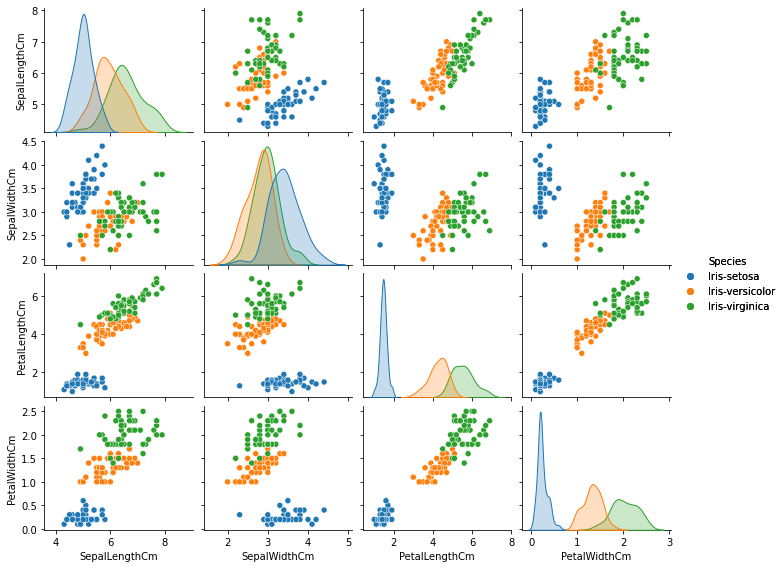

In [ ]:
k=iris.drop('Id', axis=1)
sns.pairplot(k, hue='Species', size=2).add_legend()

As we can see that iris-setosa can be easily identified there is only few overlappings with the properties of the other iris flowers ....
so we can derive a line to separate them form the other two flowers...


**Here marginal distribution curve also giving very much idea about the different properties of the iris flowers **

The probability of one event in the presence of all (or a subset of) outcomes of the other random variable is called the marginal probability or the marginal distribution. The marginal probability of one random variable in the presence of additional random variables is referred to as the marginal probability distribution.

** Using the elbow method to estimate the value k**


In [ ]:
kmeans5 = KMeans(n_clusters=5)
y = kmeans5.fit_predict(x)
print(y)
#  all the predicted values are stored in the Y that will be between 0 to 4...

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


Now at this point we don't know how many clusters are required so we divide this clusters into 5 clusters ... after dividing in 5 clusters we will try do minimize this cluster count...

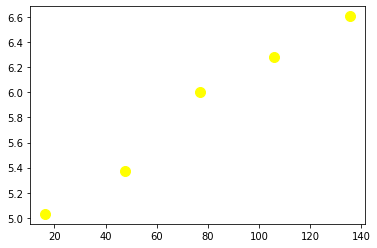

In [ ]:
kmeans5.cluster_centers_
plt.scatter(kmeans5.cluster_centers_[:,0], kmeans5.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

After dividing into five clusters we can find their centers which will help us to how data is spread around the centre of each cluster...

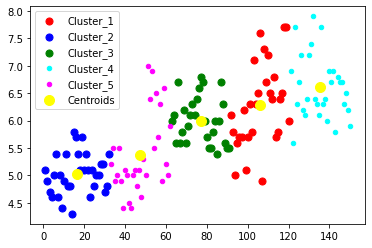

In [ ]:
#x[y==0,0] finds all the rows of x that have a y value of 0 (y == 0), and are in the first column of X i.e sepal length
# Similarly  x[y==0,1] finds all the rows of x that have a y value of 0 (y == 0), and are in the second column of X i.e sepal width
plt.scatter(x[y == 0,0], x[y==0,1], s = 50, c= 'red', label = 'Cluster_1')
plt.scatter(x[y == 1,0], x[y==1,1], s = 50, c= 'blue', label = 'Cluster_2')
plt.scatter(x[y == 2,0], x[y==2,1], s = 50, c= 'green', label = 'Cluster_3')
plt.scatter(x[y == 3,0], x[y==3,1], s = 20, c= 'cyan', label = 'Cluster_4')
plt.scatter(x[y == 4,0], x[y==4,1], s = 20, c= 'magenta', label = 'Cluster_5')

plt.scatter(kmeans5.cluster_centers_[:,0], kmeans5.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()


as we can see that cluter 1,5 are evenly distributed around their centre but cluster 2,3,4 are not evenly distributed around their centre so we will try elbow method to find the best fit number of clusters...


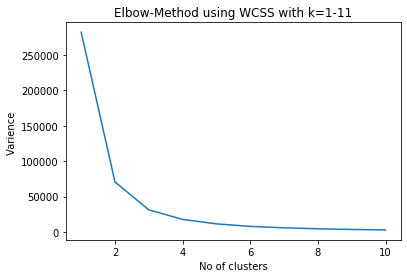

In [ ]:
Error=[]
for i in range(1, 11):
    kmeans11 = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0).fit(x)
    kmeans11.fit(x)
    Error.append(kmeans11.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow-Method using WCSS with k=1-11')
plt.xlabel('No of clusters')
plt.ylabel('Varience ') #within cluster sum of squares
plt.show()

This Elbow method shows that there are two points at the second point that is at 3 we can see that after this point error are going to decreasing slowly...

In [ ]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype == np.number:
        continue
df[column] = LabelEncoder().fit_transform(df[column])  
X= df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from numpy.ma.core import size
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KMeans:
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [
            euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)
        ]
        return sum(distances) == 0




# Testing
if __name__ == "__main__":
    iris = pd.read_csv('Iris.csv')
    iris=iris.drop('Id', axis=1)
    X=iris.iloc[:,:-1].values
    print(X.shape)
    y=iris.iloc[:,-1].values
    # print(y)


    k = KMeans(K=3, max_iters=150, plot_steps=False)
    y_pred = k.predict(X)
    print(y_pred)

    # k.plot()



(150, 4)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 2. 0. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 0. 0. 2. 2. 2. 2. 0.
 2. 0. 2. 0. 2. 2. 0. 0. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 0. 2. 2. 2. 0. 2.
 2. 2. 0. 2. 2. 0.]


In [ ]:
setosa=1
versicolor=0
virginica=2
y_label=[]

for x in y:
  if x=="Iris-setosa":
    y_label.append(setosa)
  elif x=="Iris-versicolor":
    y_label.append(versicolor)
  elif x=="Iris-virginica":
    y_label.append(virginica)



In [ ]:

print("Confusion matrix = \n",sm.confusion_matrix(y_pred, y_label))

Confusion matrix = 
 [[48  0 14]
 [ 0 50  0]
 [ 2  0 36]]


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_label,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.96      0.86        50
           1       1.00      1.00      1.00        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150

